In [6]:
import numpy as np
from matplotlib import pyplot as plt
import proplot as pplt
import seaborn as sns
from scipy import ndimage

plt.rcParams['grid.alpha'] = 0.04
plt.rcParams['axes.grid'] = False

In [15]:
filename = 'image_2021.9.7_15.51.19.dat'
Z = np.loadtxt(filename).reshape(200, 400)

In [16]:
xx = np.array(list(range(Z.shape[1]))).astype(float)
yy = np.array(list(range(Z.shape[0]))).astype(float)
xx *= (1 / 1.77)
yy *= (1 / 1.77)
X, Y = np.meshgrid(xx, yy)

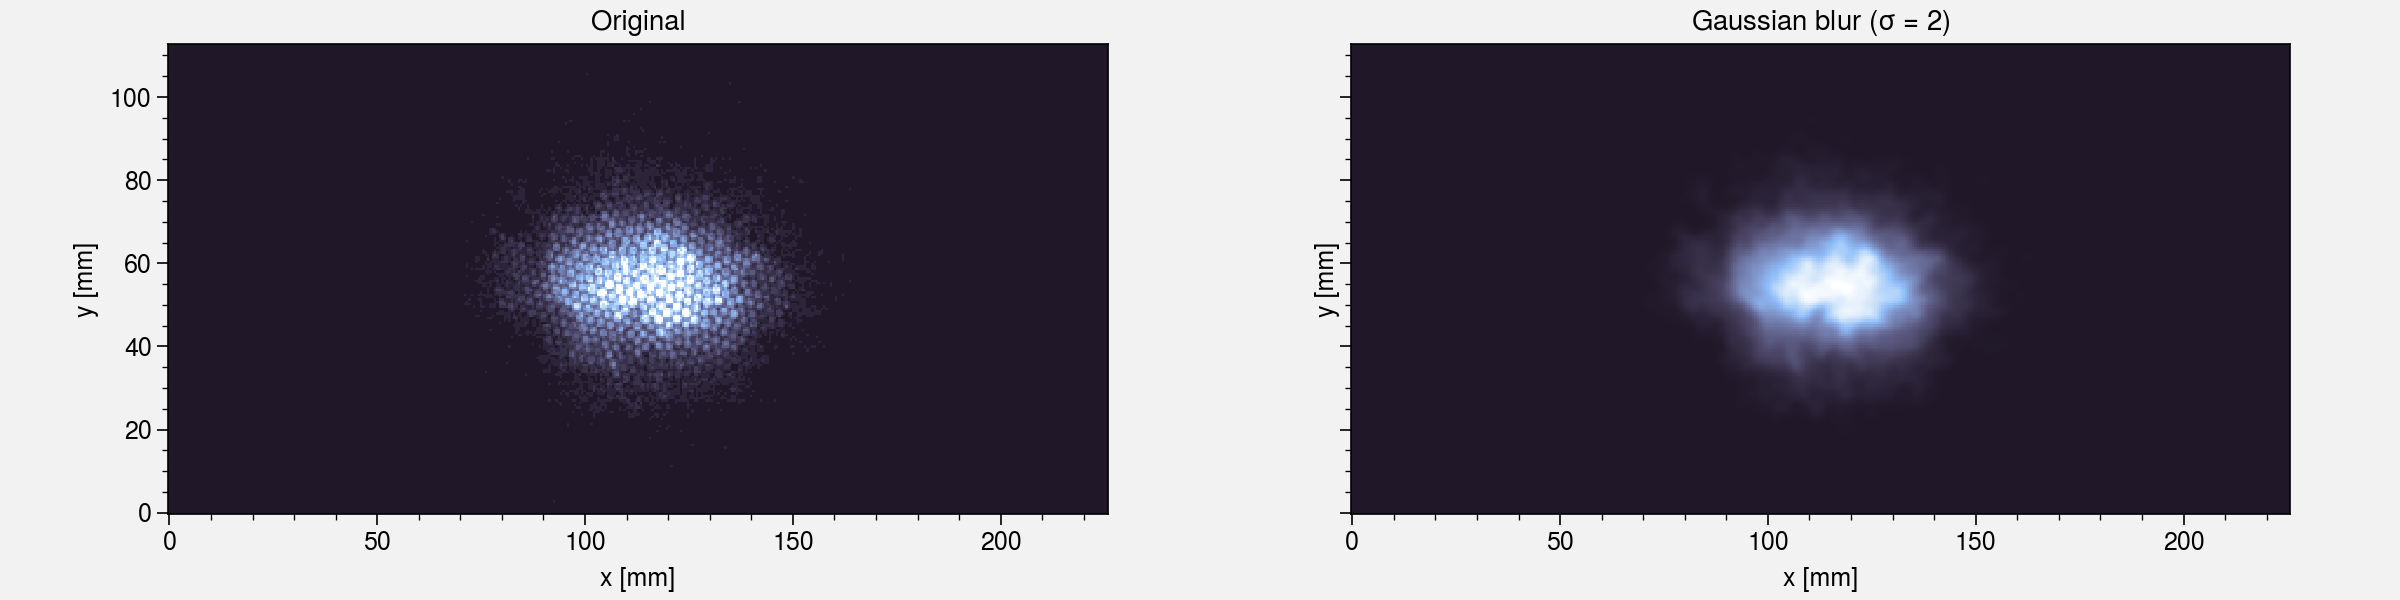

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 3), sharex=True, sharey=True, constrained_layout=True)
for ax in axes:
    ax.set_aspect(1)
    ax.set_xlabel('x [mm]')
    ax.set_ylabel('y [mm]')
filter_strength = 2
Zf = ndimage.gaussian_filter(Z, sigma=2*[filter_strength], order=0)
axes[0].pcolormesh(X, Y, Z, cmap='dusk_r', shading='auto')
axes[1].pcolormesh(X, Y, Zf, cmap='dusk_r', shading='auto')
axes[0].set_title('Original')
axes[1].set_title(r'Gaussian blur ($\sigma$ = {})'.format(filter_strength))
# plt.savefig('target_image.png', facecolor='white')
plt.show()

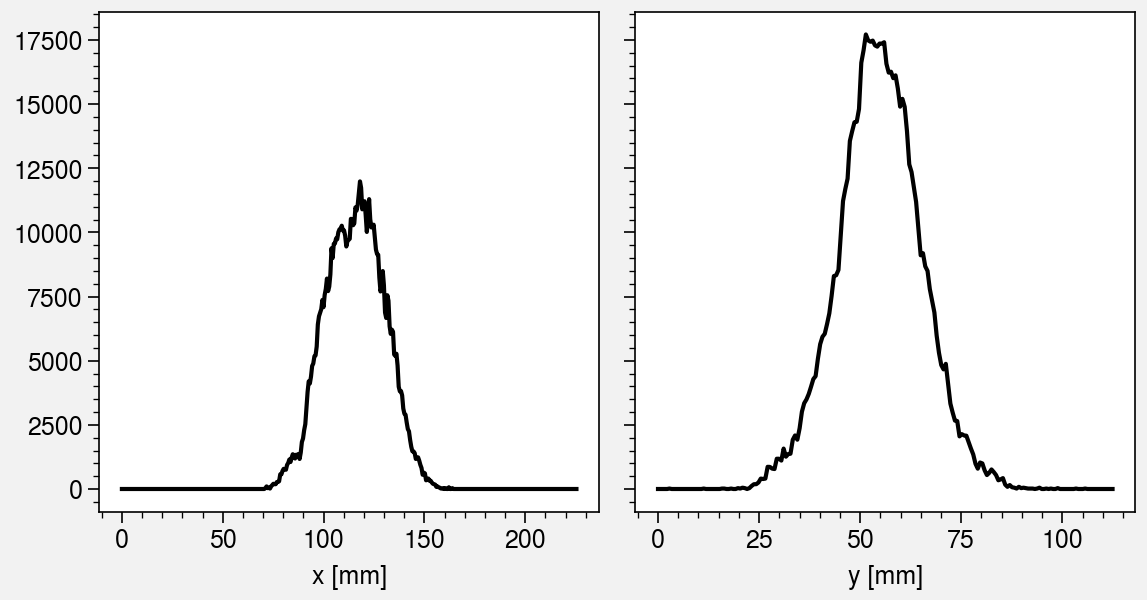

In [18]:
x_proj = np.sum(Z, axis=0)
y_proj = np.sum(Z, axis=1)

fig, axes = pplt.subplots(ncols=2, spanx=False)
axes[0].plot(xx, x_proj, c='k')
axes[1].plot(yy, y_proj, c='k')
axes[0].format(xlabel='x [mm]')
axes[1].format(xlabel='y [mm]')
plt.show()